<a href="https://colab.research.google.com/github/Eva-Claire/ds-pandas_dataframes-bqs-32/blob/main/Python_Basics_Data_Cleaning_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning Basics

In [ ]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Validity

Let's consider what issues you might want to investigate when you're checking the validity of your data

*   Irrelevant Data; data that is not actually needed, and doesn’t fit under the context of the problem we’re trying to solve. It's easy to just drop such columns from your datarame

*   Syntax Errors e.g white spaces or other characters, typos
*   Outliers; values that are significantly different from all other observation. Any data value that lies more than (1.5 * IQR) away from the Q1 and Q3 quartiles is considered an outlier. For example, When one student averages over 90% while the rest of the class is at 40% – a clear outlier. Outliers are innocent until proven guilty. With that being said, they should not be removed unless there is a good reason for that.

In [ ]:
# Syntax Errors
# Creating the DataFrame to be used
syntax_df = {
    'County':['     Nairobi     ', ' Machakos       ', ' Kisumu', 'Nakuru       ', 'Naroko '],
   'Score':[73, 83, 75, 84, 61]}

syntax_df = pd.DataFrame(syntax_df,columns=['County','Score'])
syntax_df # Displaying the resulting dataframe

,County,Score
0,Nairobi,73
1,Machakos,83
2,Kisumu,75
3,Nakuru,84
4,Naroko,61


In [ ]:
# We can also use str.replace() function on the respective column to strip all the spaces
syntax_df['County'] = syntax_df['County'].str.replace(" ","")

In [ ]:
# Fix typos: Strings can be entered in many different ways, and no wonder they can have mistakes.
# If you want to replace certain words - "Naroko" with "Narok"

syntax_df['County'] =syntax_df['County'].str.replace('Naroko', 'Narok')
syntax_df

,County,Score
0,Nairobi,73
1,Machakos,83
2,Kisumu,75
3,Nakuru,84
4,Narok,61


In [ ]:
# Outliers
# Making the dataframe from csv file
outliers_df = pd.read_csv("http://bit.ly/BostonHousingDataset")
outliers_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# Outliers - IQR
# We can identify outliers using the interquartile range (IQR).
# This is the first quartile subtracted from the third quartile or simply put,
# the interquartile range (IQR is the range covered by the middle 50% of the data;
# The first and third quartile can be clearly seen on a box plot on the data.
# It is a measure of the dispersion similar to standard deviation or variance,
# but is much more robust against outliers.
# First, let's calculate IQR for each column.

Q1 = outliers_df.quantile(0.25) # First quartile
Q3 = outliers_df.quantile(0.75) # Third quartile
IQR = Q3 - Q1

print(IQR)

crim         3.595038
zn          12.500000
indus       12.910000
chas         0.000000
nox          0.175000
rm           0.738000
age         49.050000
dis          3.088250
rad         20.000000
tax        387.000000
ptratio      2.800000
b           20.847500
lstat       10.005000
medv         7.975000
dtype: float64


<Axes: xlabel='dis'>

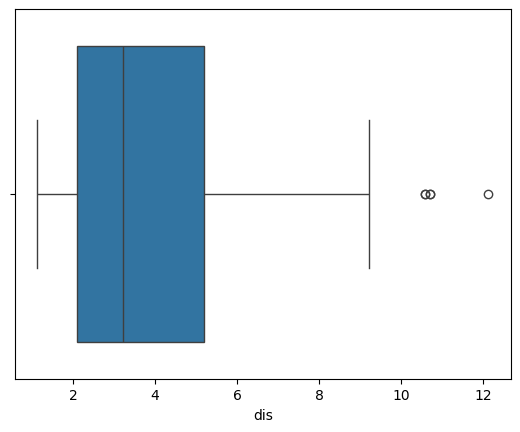

In [ ]:
# Box plot
# We can also discover outliers with visualization tools
# A box plot is a method for graphically depicting groups of numerical data through their quartiles.
# Box plots may also have lines extending vertically from the boxes (whiskers)
# indicating variability outside the upper and lower quartiles.


# In this example, we will plot outliers as individual points.
#

# We will use seaborn library which is a python visualisation library based on matplotlib.
# It provides a high-level interface for drawing attractive and informative statistical graphics.

# We will analyse uni-variate outlier i.e. we will use dis column only to check the outlier.
#
sns.boxplot(x = outliers_df['dis'])

In [ ]:
# Removing the outliers (IQR Score -)
outliers_df_iqr = outliers_df[~((outliers_df < (Q1 - 1.5 * IQR)) |(outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(outliers_df_iqr.shape) # The number of rows and columns in the new dataframe

(268, 14)


In [ ]:
# The number of rows and columns before removing outliers
outliers_df.shape

(506, 14)

### Accuracy

These errors result from having two or more values in the same row or across datasets that contradict with each other. For example; if we have a dataset about the cost of living in cities, the total column must be equivalent to the sum of rent, transport, and food. Similarly, a child can’t be married; the sum of  total male population and total female population cannot be < or > total population, e.t.c.

### Completeness

In [ ]:
# Checking/ Counting Missing Values

# Creating a dataframe to work with
missing_df = {
    'Subject':['Humanities', 'Physical Education', 'Home Science', 'Mathematics', 'Physics',
               'Chemistry','Arts'],
   'Score':[62, 47, np.nan, 74, np.nan, 77, 85]}

missing_df = pd.DataFrame(missing_df,columns=['Subject','Score'])

print(missing_df)

# Checking if there is any missing value in dataframe as a whole
# Uncomment the following line after running the previous lines
# missing_df.isnull()

# Checking if there is any missing value across each column
# Uncomment the following line after running the previous lines
# missing_df.isnull().any()

# Checking how many missing values there are across each column
# Uncomment the following line after running the previous lines
# missing_df.isnull().sum()

# Or we can do a quick check to see if we have any missing values at all
# Uncomment the following line after running the previous lines
# print(missing_df.isnull().values.any())

# We might also want to get a total count of missing values
# Uncomment the following line after running the previous lines
# print(missing_df.isnull().sum().sum())

              Subject  Score
0          Humanities   62.0
1  Physical Education   47.0
2        Home Science    NaN
3         Mathematics   74.0
4             Physics    NaN
5           Chemistry   77.0
6                Arts   85.0


In [ ]:
# Dropping Missing Values
# If there are only a few null values and you know that deleting values
# will not cause adverse effects on your result,
# remove them from your DataFrame and store that in a new DataFrame

# Droppping all
# Uncomment the following 2 lines after running the previous lines
# clean_df = missing_df.dropna()
# print(clean_df)

# Verifying that you no longer have any null values by running
# Uncomment the following line after running the previous lines
# print(clean_df.isnull().sum())

In [ ]:
# Filling Missing Values
# Imputing the attribute median for all missing values
#

# Creating a dataframe to work with
subjects_df_median = {
    'Subject':['Humanities', 'Physical Education', 'Home Science', 'Mathematics', 'Physics',
               'Chemistry','Arts'],
   'Score':[62, 47, np.nan, 74, np.nan, 77, 85]}
subjects_df_median = pd.DataFrame(subjects_df_median,columns=['Subject','Score'])

# printing our dataframe before filling
print("Before Filling the Null values")
print(subjects_df_median)

# imputing the median
subjects_df_median['Score'] = subjects_df_median['Score'].fillna((subjects_df_median['Score'].median()))

# printing out our updated dataframe
print("After Filling the Null values")
print(subjects_df_median)

Before Filling the Null values
              Subject  Score
0          Humanities   62.0
1  Physical Education   47.0
2        Home Science    NaN
3         Mathematics   74.0
4             Physics    NaN
5           Chemistry   77.0
6                Arts   85.0
After Filling the Null values
              Subject  Score
0          Humanities   62.0
1  Physical Education   47.0
2        Home Science   74.0
3         Mathematics   74.0
4             Physics   74.0
5           Chemistry   77.0
6                Arts   85.0


In [ ]:
# Or maybe we just want to fill in missing values with a single value as shown below
#

subjects_df_value = {
    'Subject':['Humanities', 'Physical Education', 'Home Science', 'Mathematics', 'Physics',
               'Chemistry','Arts'],
   'Score':[62, 47, np.nan, 74, np.nan, 77, 85]}

subjects_df_value = pd.DataFrame(subjects_df_value,columns=['Subject','Score'])

# Replace missing values with a number
subjects_df_value['Score'].fillna(60, inplace=True)

print(subjects_df_value)

              Subject  Score
0          Humanities   62.0
1  Physical Education   47.0
2        Home Science   60.0
3         Mathematics   74.0
4             Physics   60.0
5           Chemistry   77.0
6                Arts   85.0


### Consistency

In [ ]:
# Duplicates; data points that are repeated in your dataset.
# These should be removed.
#

raw_data = {'first_name': ['Jamila', 'Jamila', 'Jane','Joma', 'Ulia', 'Dorcas'],
        'last_name': ['Mohammed', 'Mohammed', 'Milner','Tech', 'Shevchenko', 'Wanjiru'],
        'age': [52, 52, 43, 77, 25, 19],
        'pre_assessment': [5, 5, 5, 43, 5, 2],
        'post_assessment': [35, 35, 25, 57, 72, 71]}
df_duplicate = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'pre_assessment', 'post_assessment'])
print(df_duplicate)


# Identifying which observations are duplicates
df_non_duplicates = df_duplicate.drop_duplicates()

# Let's see these non-duplicate files
print("Without Duplicates:", df_non_duplicates)

  first_name   last_name  age  pre_assessment  post_assessment
0     Jamila    Mohammed   52               5               35
1     Jamila    Mohammed   52               5               35
2       Jane      Milner   43               5               25
3       Joma        Tech   77              43               57
4       Ulia  Shevchenko   25               5               72
5     Dorcas     Wanjiru   19               2               71
Without Duplicates:   first_name   last_name  age  pre_assessment  post_assessment
0     Jamila    Mohammed   52               5               35
2       Jane      Milner   43               5               25
3       Joma        Tech   77              43               57
4       Ulia  Shevchenko   25               5               72
5     Dorcas     Wanjiru   19               2               71


### Uniformity

In [ ]:
# Renaming column names;

# Create an example dataframe
officials_data = {'Moderator': ['Wanjiku', 'Muthoni', 'Kagure', 'Muema', 'Kariuki'],
        'Date': ['2015-02-11', '2013-02-22', '2015-02-11', '2014-02-11', '2011-02-11'],
        'Score': [14, 34, 41, 12, 13]}
officials_data = pd.DataFrame(officials_data)
print(officials_data)

print("Renamed Columns")

# Renaming the column names
officials_data.columns = ['Senior Leader', 'Time', 'Score']
print(officials_data)

  Moderator        Date  Score
0   Wanjiku  2015-02-11     14
1   Muthoni  2013-02-22     34
2    Kagure  2015-02-11     41
3     Muema  2014-02-11     12
4   Kariuki  2011-02-11     13
Renamed Columns
  Senior Leader        Time  Score
0       Wanjiku  2015-02-11     14
1       Muthoni  2013-02-22     34
2        Kagure  2015-02-11     41
3         Muema  2014-02-11     12
4       Kariuki  2011-02-11     13


In [ ]:
# Fixing messy column names
# Sometimes you might have column names which are uppercase, with spaces,
# and whitespace all around. How do we fix this?
# We use the .str method that we use on text data.
# Ideally, we chain a bunch of .str functions as shown below;
#

# we use strip(), lower() and replace() functions to clean up the column names using regular expressions
officials_data.columns = officials_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
print(officials_data)

  senior_leader        time  score
0       Wanjiku  2015-02-11     14
1       Muthoni  2013-02-22     34
2        Kagure  2015-02-11     41
3         Muema  2014-02-11     12
4       Kariuki  2011-02-11     13


<ipython-input-16-7d03766c7704>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  officials_data.columns = officials_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
<ipython-input-16-7d03766c7704>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  officials_data.columns = officials_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [ ]:
# Data Type conversion
# Sometimes, especially when we’re reading in a CSV with a bunch of numbers,
# some of the numbers will read in as strings instead of numeric values, or vice versa.
# Let's fix the release year to be a string and not a number;
# In pandas, the datatype string appears as object
#

# First let's see how our datatypes appear while loading the dataset
data = pd.read_csv('http://bit.ly/MovieMetaData')
print(data.info())

print("Data Types of the columns in the dataframe")

# Now let's specify that our 'title year should be cast type as a string'
# Uncomment the lines below after running the previous lines
data = pd.read_csv('http://bit.ly/MovieMetaData', dtype={'title_year': str})
print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
# Make sure numbers are stored as numerical data types.
# A date should be stored as a date object, or a Unix timestamp (number of seconds)

# Let's convert our strings to Datetime data type
# importing datatime module
from datetime import datetime

# Creating our data frame
data = {'date': ['2015-05-01 18:47:05.069722', '2015-05-01 18:47:05.119994',
                 '2015-05-02 18:47:05.178768', '2015-05-02 18:47:05.230071',
                 '2015-05-02 18:47:05.230071', '2015-05-02 18:47:05.280592',
                 '2015-05-03 18:47:05.332662', '2015-05-03 18:47:05.385109',
                 '2015-05-04 18:47:05.436523', '2015-05-04 18:47:05.486877'],
        'value': [1, 2, 4, 5, 6, 3, 2, 1, 15, 11]}
date_df = pd.DataFrame(data, columns = ['date', 'value'])

# printing our dataframe
print(date_df.info())

# Converting date column from string to datetime
date_df['date'] = pd.to_datetime(date_df['date'])

# printing our updated dataframe
print(date_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    10 non-null     object
 1   value   10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   value   10 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 288.0 bytes
None


## Data Analysis Basics

In [1]:
# Importing libraries necessary for EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# We'll use this dataset to run most of the examples in this section

nba_df = pd.read_csv("http://bit.ly/MSDS-NBADataset", index_col = 'Name') # Loading the dataset
nba_df.head() # Displaying the first 5 rows of the dataframe

In [ ]:
# Let's create a function that does some bit of descriptive analysis to understand our dataset

def descriptive_stats(data, num_rows=10):
    """
    This function takes a Pandas DataFrame as input and returns a summary of its descriptive statistics, along with some basic visualizations.

    Args:
        data (pd.DataFrame): A Pandas DataFrame containing the dataset to be analyzed.
        num_rows (int): The number of rows from the dataset to display.

    Returns:
        None. Instead, the function prints the summary statistics and displays the visualizations.
    """

    # Print the first few rows of the dataset
    print("\nFirst {} rows of the dataset:\n".format(num_rows))
    print(data.head(num_rows))

    # Print the column data types
    print("\nColumn data types:\n")
    print(data.dtypes)

    # Print the missing values count
    print("\nMissing values count:\n")
    print(data.isnull().sum())

    # Print the summary statistics
    print("\nSummary statistics:\n")
    print(data.describe())

In [ ]:
# Calling the function on the nba_df dataframe
descriptive_stats(nba_df)

### Univariate Analysis

When conducting any type of analyses on your data you need to consider the variable type.

*   For categorical variable we can plot frequency tables; bar charts/histograms; pie charts
*   For numerical variables we check the measures of central tendency/dispersion and plots like histograms



#### Categorical Variables

In [ ]:
# frequency tables
# A frequency table displays a set of values along with the frequency with which they appear.
# They allow us to better understand which data values are common and which are uncommon.
# value counts

nba_df.Team.value_counts()  # Frequency table of the Team column

# use the crosstab function to check frequency of other categorical columns
# pd.crosstab(data['col'], '<frequency>')
# YOUR CODE HERE

In [ ]:
# bar charts
# A bar chart is a graph that represents the categorical data with rectangular bars.
# The length of each bar is proportional to the value it represents.
# It is used to compare two or more values.

# Let's plot a bar chart of the Position column
nba_df.groupby('Position').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# add title and labels
plt.title('Bar chart of Position')
plt.xlabel('Frequency')

# Remove the top and right spines
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# bar chart of the Weight column
# YOUR CODE HERE

# add title and labels
# YOUR CODE HERE

# Remove the top and right spines
# YOUR CODE HERE

#### Numerical Variables

In [ ]:
# measures of central tendency
# quick analysis on the measure of central tendency; mean, median, mode
# measures of dispersion; range, variance, standard deviation, skewness, kurtosis

# Summary statistics of the numerical columns
# YOUR CODE HERE

In [ ]:
# let's check the skewness and kurtosis of the dataset
nba_df.kurt() # Kurtosis of the dataset

# Skewness of the dataset
# YOUR CODE HERE

In [ ]:
# Histograms
# A histogram is a graphical representation of the distribution of numerical data.
# It is an estimate of the probability distribution of a continuous variable.
# It is a kind of bar graph.
# To construct a histogram, the first step is to “bin” the range of values
# i.e. divide the entire range of values into a series of intervals
# and then count how many values fall into each interval.

# create histograms for the numerical variables in nba_df
# YOUR CODE HERE

### Bivariate Analysis

#### Categorical | Categorical

In [ ]:
# Stacked Column Chart
# Stacked column charts work well when the focus of the chart is to compare the totals and one part of the totals.
# It is a useful graph to visualize the relationship between two categorical variables.
# It compares the percentage that each category from one variable contributes to a total across categories of the second variable.

# We can create a stacked bar chart through the use of the pyplot.bar() function.
# NB: Remember pyplot from when we imported matplotlib.pyplot...
# Let's create a simple stacked column chart

teams       = ['Kiboko', 'Kifaru', 'Twiga', 'Ndovu'] # The labels for our teams
womenPoints = [10 , 25, 40, 23]
menPoints   = [10 , 20, 15, 22]

X = [team for team in teams] # The label locations

plt.bar(X, womenPoints, label='Women') # Plotting
plt.bar(X, menPoints, label='Men', bottom = womenPoints)

# Labeling our y axis
plt.ylabel("Points")

# Labeling our x axis
plt.xlabel("Teams")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Teams vs Points")

# Displaying our chart
plt.show()

In [ ]:
# Create a column chart from the data provided below
countries = ['Norway', 'Germany', 'Canada', 'United States', 'Netherlands']
bronzes   = np.array([10, 7, 10, 6, 6])
silvers   = np.array([14, 10, 8, 8, 6])
golds     = np.array([14, 14, 11, 9, 8])

# YOUR CODE HERE

#### Numerical | Numerical

In [ ]:
# Scatter Plot
# A simple scatter plot simply maps each variable of interest to a point in two-dimensional space.
# It is used to observe relationships between variables.
# The position of each point on the horizontal and vertical axis indicates values for an individual data point.

nba_df.plot(kind='scatter', x='Weight', y='Salary', s=32, alpha=.8) # Scatter plot of Weight vs Salary
plt.gca().spines[['top', 'right',]].set_visible(False) # Remove the top and right spines

# Labeling our x axis
# YOUR CODE HERE

# Labeling our y axis
# YOUR CODE HERE

# Adding a title
# YOUR CODE HERE

# Displaying our chart
# YOUR CODE HERE

In [ ]:
# Create a scatter plot of the Age and Number columns in the nba_df dataframe and add necessary labels and title
# YOUR CODE HERE

In [ ]:
# Correlation
# a statistical measure that describes the association between random variables.
# It is a measure of how things are related.


# Create a correlation matrix
corr_matrix = nba_df.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

#### Categorical | Numerical

In [ ]:
# Line Charts
# A line chart or line plot is a type of plot which displays information as a series of data points
# called 'markers' connected by straight line segments.
# It is also used to compare two or more variables.

# Loading our dataset
bikes_dataset_df = pd.read_csv("http://bit.ly/Bikes-Sales-Dataset")

# Plotting our line graph
# YOUR CODE HERE

# Giving a title to our line graph
# YOUR CODE HERE

# Labelling the y-axis
# YOUR CODE HERE

# Labelling the x-axis
# YOUR CODE HERE

# Displaying our graph
# YOUR CODE HERE

In [ ]:
# Create a line graph using the data given below
# ---
#

years = [1960, 1970, 1980, 1990, 2000, 2010]
population_millions= [449.48, 553.57, 696.783, 870.133, 1000.4, 1309.1]

# YOUR CODE HERE